In [8]:
import numpy as np
import matplotlib as plt
import pandas as pd



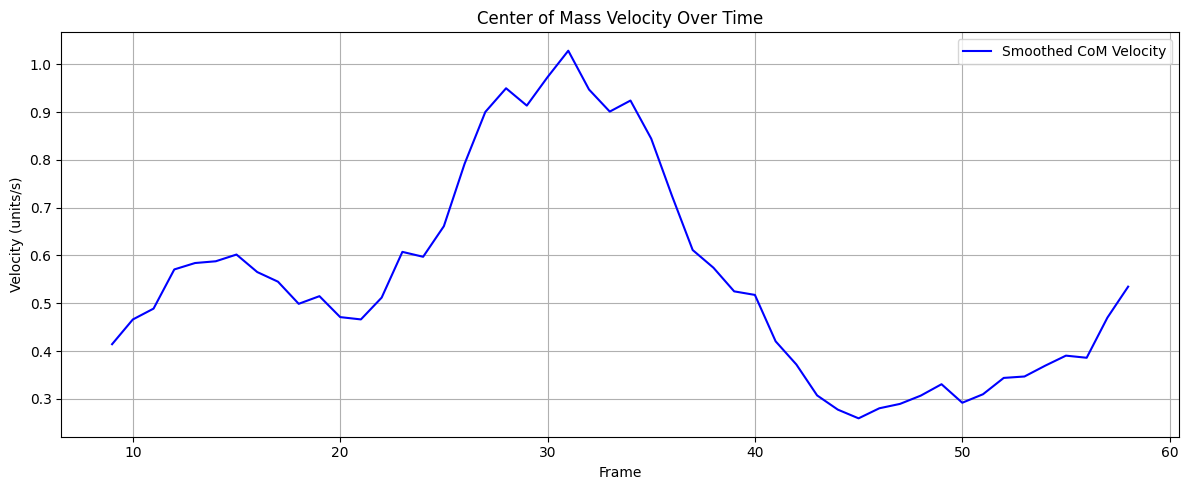

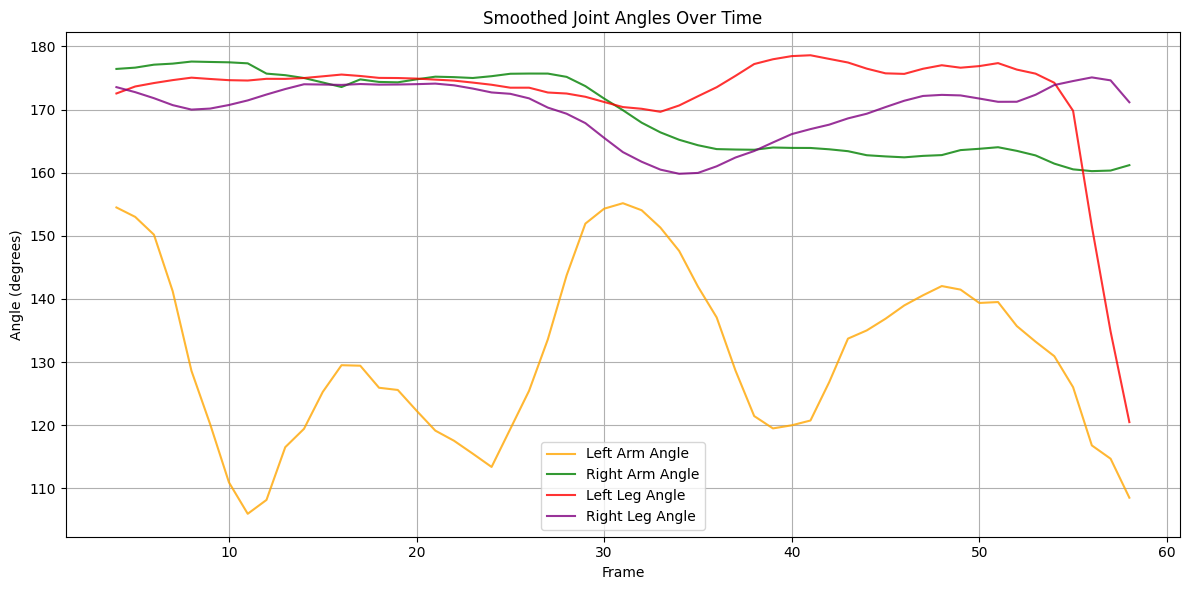

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load spreadsheet
df = pd.read_csv('joint_angles_1_1_1.mp4.csv')

# Smooth the CoM velocity
df['Smoothed_Velocity'] = df['CoM Velocity'].rolling(window=10).mean()

# Smooth joint angles
joint_columns = ['Left Arm Angle', 'Right Arm Angle', 'Left Leg Angle', 'Right Leg Angle']
smoothed_joint_columns = []

for joint in joint_columns:
    if joint in df.columns:
        smooth_col = f'Smoothed_{joint}'
        df[smooth_col] = df[joint].rolling(window=5).mean()
        smoothed_joint_columns.append(smooth_col)

# Plot 1: Smoothed velocity
plt.figure(figsize=(12, 5))
plt.plot(df['Frame'], df['Smoothed_Velocity'], label='Smoothed CoM Velocity', color='blue')
plt.title("Center of Mass Velocity Over Time")
plt.xlabel("Frame")
plt.ylabel("Velocity (units/s)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Plot 2: Smoothed joint angles
plt.figure(figsize=(12, 6))
colors = ['orange', 'green', 'red', 'purple']

for joint_col, color in zip(smoothed_joint_columns, colors):
    plt.plot(df['Frame'], df[joint_col], label=joint_col.replace('Smoothed_', ''), color=color, alpha=0.8)

plt.title("Smoothed Joint Angles Over Time")
plt.xlabel("Frame")
plt.ylabel("Angle (degrees)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
